# Bonus # 2: Training neural networks with backpropagation using Gradient Descent with Momentum
@Author: Juan Andrés Méndez Galvis

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# What is gradiant descent?
Gradient Descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost). In other words, it is a method to find the minimum of a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.


## How does gradient descent work?

Gradient Descent works by iteratively updating the values of the parameters (coefficients) of a function (f) in the opposite direction of the gradient of the cost function (cost) with respect to the parameters. The gradient of the cost function is most of the time calculated using the first derivative of the cost function with respect to the parameters. Although the are some cases for example where the gradient is calculated using methdos such as backpropagation In the case of neural networks.

### But how does this happen? (MSE Cost Function)

![MSE Cost Function](assets/MSE_cost_f.png)

> note: For gradient descent the cost function can be any function, but for this example we will use the Mean Squared Error (MSE) cost function.

For this we plot a 3d plot between the coefficients, slope $m$ and intercept $b$ and the cost function $MSE(cost)$. Since the gradient descent is an iterative process, we start at a random point in the 3d plot and calculate the gradient of the cost function with respect to the parameters. Then we update the parameters in the opposite direction of the gradient. This process is repeated until the gradient is close to zero or the cost function is minimized.

## MSE(cost)

The cost function used in this example is the Mean Squared Error (MSE) cost function. The MSE cost function is used to measure the difference between the predicted values and the actual values. The MSE cost function is defined as:

$$MSE(cost) = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

Where:
- $n$ is the number of observations
- $y_{i}$ is the actual value
- $\hat{y}_{i}$ is the predicted value

# The gradient descent algorithm

Now that we know how gradient descent works, let's see the algorithm in a more formal way:

---

***Algorithm: Gradient Descent***

---

1. Initialize:
    - $\alpha$: Learning rate
    - Random values for the $b$ and $m$ coefficients
2. **while** t < max_iterations:
    - t <- t + 1
    - m_t <- m_t - $\alpha$ * $\frac{\partial}{\partial m}MSE(cost)$
    - b_t <- b_t - $\alpha$ * $\frac{\partial}{\partial b}MSE(cost)$
3. **end while**






## Python Implementation

For this implementation, we will use the following libraries:
- `symPy`: To calculate the gradient of the cost function
- `numpy`: To handle the data

For this example, we will create a cost function $(x - 2)^{2} + (y - 3)^{2}$ and calculate the gradient of the cost function with respect to the parameters $x$ and $y$.

In [12]:
x, y = sp.symbols('x y')

cost = (x - 2)**2 + (y - 3)**2
cost

(x - 2)**2 + (y - 3)**2

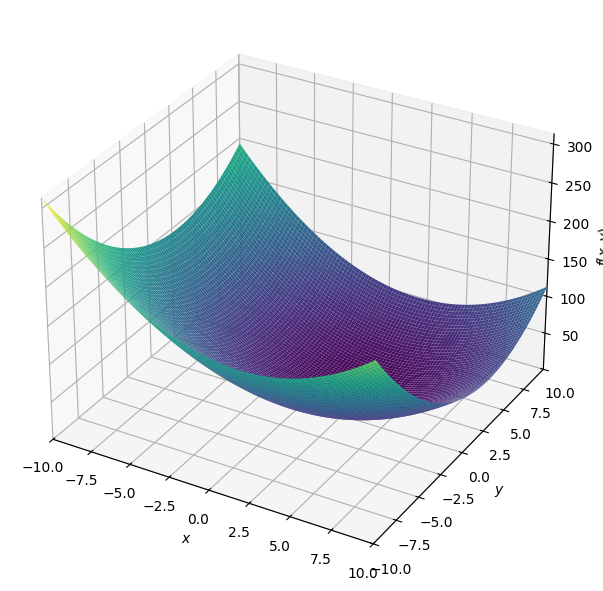

In [13]:
sp.plotting.plot3d(cost, (x, -10, 10), (y, -10, 10), size=(8, 6))

In [14]:
def compute_cosst(costfxn, x0, y0):
    return round(costfxn.subs({x: x0, y: y0}), 2)

## Example for Gradient Descent in 3D

![Gradient Descent 3d example](assets/Gradiant_Descent_3d_example.png)

## Example for Gradient Descent in 3D

![Costs vs iterations graphs](assets/cost_vs_iterations.png)

# Gradient Descent and Neural Networks

Now that we know how gradient descent works and how to implement it in Python, let's see how gradient descent is used to train neural networks using backpropagation.

# Understanding Neural Networks and Gradient Descent

## What is a Neural Network?
![Neural Network](assets/NN_fundamentals.png)

A neural network is a computational model inspired by the human brain's neural structure. It consists of interconnected units called neurons, organized in layers, that collectively learn to perform tasks by analyzing examples. Neural networks excel at finding patterns in complex, high-dimensional data where traditional algorithms struggle.

### Core Components:
- **Input Layer**: Receives raw data and passes it to the network
- **Hidden Layers**: Process information through weighted connections
- **Output Layer**: Produces the final prediction or classification
- **Weights & Biases**: Adjustable parameters that determine the network's behavior
- **Activation Functions**: Non-linear transformations that enable the modeling of complex relationships

## How is the Output of a Neural Network Calculated?

The computation flows forward through the network, with each layer processing information before passing it to the next:

1. **Linear Transformation**:
   For each neuron, we compute the weighted sum of inputs plus a bias term:
   $$z = \theta \cdot x + b$$
   Where:
   - $\theta$ represents the weights connecting to this neuron
   - $x$ represents the input values
   - $b$ represents the bias term

2. **Non-linear Activation**:
   The weighted sum is passed through an activation function:
   $$a = \sigma(z)$$
   Where $\sigma$ is the activation function

3. **Layer-by-layer Processing**:
   This process repeats through each layer, with the outputs of one layer becoming the inputs to the next.

### Common Activation Functions:
- **Sigmoid**: $\sigma(z) = \frac{1}{1 + e^{-z}}$ 
  - *Properties*: Outputs between 0 and 1; useful for binary classification
- **Tanh**: $\sigma(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$ 
  - *Properties*: Outputs between -1 and 1; often performs better than sigmoid
- **ReLU** (Rectified Linear Unit): $\sigma(z) = \max(0, z)$ 
  - *Properties*: Simple, computationally efficient, helps mitigate vanishing gradient problems
- **Leaky ReLU**: $\sigma(z) = \max(0.01z, z)$ 
  - *Properties*: Addresses "dying ReLU" problem by allowing small negative values
- **Softmax**: $\sigma(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$ 
  - *Properties*: Outputs sum to 1; ideal for multi-class classification

## The Role of Gradient Descent in Neural Networks

Neural networks learn by adjusting their weights and biases to minimize a loss function that measures the difference between predicted and actual outputs. Gradient descent is the foundational optimization algorithm that enables this learning process.

### How Gradient Descent Works:

1. **Loss Function Definition**: 
   We define a function that quantifies the error in the network's predictions.
   Common loss functions include Mean Squared Error (MSE) for regression and Cross-Entropy for classification.

2. **Gradient Calculation**: 
   We compute the gradient (partial derivatives) of the loss function with respect to each weight and bias.
   This gradient points in the direction of steepest increase in the loss.

3. **Parameter Updates**:
   We update each parameter in the opposite direction of its gradient:
   $$\theta_{new} = \theta_{old} - \alpha \nabla_\theta L(\theta)$$
   Where:
   - $\alpha$ is the learning rate (step size)
   - $\nabla_\theta L(\theta)$ is the gradient of the loss with respect to parameter $\theta$

4. **Iteration**:
   Steps 2-3 are repeated until convergence or a stopping criterion is met.

### Backpropagation: Efficiently Computing Gradients

Backpropagation is an algorithm that efficiently computes gradients in neural networks by applying the chain rule of calculus. It works by:

1. **Forward Pass**: Computing outputs and storing intermediate values
2. **Backward Pass**: Propagating error gradients from the output layer back to the input layer
3. **Gradient Accumulation**: Collecting gradients for each parameter

### Variants of Gradient Descent:

- **Batch Gradient Descent**: Updates parameters using gradients computed from the entire dataset
  - *Pros*: Stable convergence
  - *Cons*: Slow for large datasets

- **Stochastic Gradient Descent (SGD)**: Updates parameters using gradients from a single data point
  - *Pros*: Faster iteration, can escape local minima
  - *Cons*: High variance in updates

- **Mini-batch Gradient Descent**: Updates parameters using gradients from a small batch of data
  - *Pros*: Balance between batch and stochastic approaches
  - *Cons*: Requires tuning of batch size

- **SGD with Momentum**: Accelerates convergence by accumulating a velocity vector
  - *Formula*: $v = \gamma v - \alpha \nabla_\theta L(\theta)$, $\theta = \theta + v$
  - *Advantage*: Helps overcome local minima and plateaus

- **Adaptive Methods** (Adam, RMSprop, Adagrad): Adjust learning rates for each parameter
  - *Advantage*: Often converge faster and require less hyperparameter tuning

## Preventing Memorization: Dropout and Regularization

Neural networks with sufficient capacity can "memorize" training data rather than learning generalizable patterns. This phenomenon, known as overfitting, results in poor performance on unseen data. To combat this, we employ techniques that selectively disable neurons during training.

### Dropout: Temporarily Disabling Neurons

Dropout is a powerful regularization technique that randomly "drops out" (sets to zero) a proportion of neurons during each training iteration:

```
During training:
a = dropout(σ(z), p)  # Where p is the probability of keeping a neuron active
```

**How Dropout Works:**
1. For each training iteration:
   - Randomly disable a fraction of neurons (typically 20-50%)
   - Perform forward and backward passes with the reduced network
   - Update only the weights of active neurons
2. During inference (testing):
   - Use all neurons but scale their outputs by the keep probability

**Mathematical Formulation:**
During training, for each neuron with activation $a$:
$$a_{dropout} = 
\begin{cases} 
\frac{a}{p} & \text{with probability } p \\
0 & \text{with probability } 1-p 
\end{cases}$$

During testing:
$$a_{test} = a$$

**Benefits of Dropout:**
- **Ensemble Effect**: Effectively trains an ensemble of subnetworks
- **Feature Co-adaptation Prevention**: Neurons cannot rely on specific other neurons being present
- **Noise Robustness**: Forces the network to learn redundant representations

### Other Regularization Techniques

Beyond dropout, additional methods help prevent memorization:

- **Weight Decay (L2 Regularization)**: Penalizes large weights in the loss function
  $$L_{regularized}(\theta) = L(\theta) + \lambda \sum_i \theta_i^2$$

- **Early Stopping**: Halts training when performance on validation data starts to degrade

- **Data Augmentation**: Artificially expands the training set by applying transformations

- **Batch Normalization**: Normalizes layer inputs, which has a regularizing effect

### Connection to Learning Principles

These techniques align with fundamental principles of learning and generalization:

1. **Occam's Razor**: Simpler explanations (models with effectively fewer parameters) tend to generalize better
   - *Dropout implements this by approximating a simpler model*

2. **Distributive Learning**: Learning across multiple pathways creates robust knowledge
   - *Dropout forces distributed representations rather than specialized neurons*

3. **Noise Robustness**: Biological learning systems must be robust to noise
   - *Dropout introduces controlled noise during training*

4. **Sparsity**: The brain activates only a small subset of neurons at any time
   - *Dropout mimics sparse activation patterns*

5. **Ensemble Learning**: Multiple diverse models typically outperform single models
   - *Dropout effectively creates an ensemble of subnetworks*

## Why Gradient Descent is Crucial for Neural Networks

Gradient descent is the engine that powers neural network learning for several reasons:

1. **Scalability**: Works well with the millions of parameters in modern networks
2. **Flexibility**: Adapts to various network architectures and loss functions
3. **Efficiency**: When combined with backpropagation, provides computationally feasible optimization
4. **Generalizability**: Enables learning from examples without explicit programming
5. **Continuous Improvement**: Forms the foundation for advanced optimization techniques

The interplay between neural network architecture, regularization methods like dropout, and gradient-based optimization has led to breakthroughs in numerous fields, from computer vision and natural language processing to reinforcement learning and beyond.

## Balancing Memorization and Generalization

The ultimate goal in neural network training is to find the sweet spot between:
- **Underfitting**: The model is too simple to capture the underlying patterns
- **Overfitting**: The model memorizes training examples but fails to generalize

Techniques like dropout help us navigate this balance by creating the effect of an ensemble of simpler models, each forced to learn robust features without co-dependence on specific neurons. This approach mirrors how human learning often benefits from varied practice conditions and exposure to noise, ultimately leading to more resilient and transferable knowledge.

## Advanced Neural Network Training Algorithm with Best Practices

Now that we understand neural networks, gradient descent, and regularization techniques like dropout, here's an enhanced algorithm that incorporates modern best practices to ensure faster learning, better generalization, and prevention of memorization:

---
**Neural Network Training Algorithm with Best Practices:**
---

### 1. **Initialization & Setup:**
   - Define the learning rate $\alpha$ (typically 0.001-0.01 for Adam, 0.01-0.1 for SGD)
   - Define batch size $B$ (typically 32-256)
   - Define dropout rate $p_{drop}$ (typically 0.2-0.5)
   - Define regularization strength $\lambda$ (typically 1e-4 to 1e-6)
   - Define early stopping patience $P$ (typically 10-20 epochs)
   - **Initialize weights properly:**
     - For ReLU activations: He initialization ($w \sim \mathcal{N}(0, \sqrt{2/n_{in}})$)
     - For tanh/sigmoid: Xavier/Glorot initialization ($w \sim \mathcal{N}(0, \sqrt{2/(n_{in} + n_{out})})$)
   - Split data into training, validation, and test sets (typically 70%/15%/15%)
   - **Preprocessing:** 
     - Normalize input features: $x_{norm} = \frac{x - \mu}{\sigma}$
     - Apply data augmentation if applicable
   
### 2. **Training Loop:**
   - **For each epoch:**
     - Shuffle training data
     - **For each mini-batch of size $B$:**
       
       - **Forward Pass (Training Mode):**
         - **For each layer in the network:**
           - If dropout layer, apply dropout mask with probability $p_{keep} = 1 - p_{drop}$:
             - Generate mask: $m \sim \text{Bernoulli}(p_{keep})$
             - Scale activations: $a = \frac{a \odot m}{p_{keep}}$ (where $\odot$ is element-wise multiplication)
           - Compute layer output: $a^{[l]} = f^{[l]}(z^{[l]})$ where $z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$
           - If batch normalization layer, normalize activations:
             - $\hat{z}^{[l]} = \frac{z^{[l]} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$
             - $z_{norm}^{[l]} = \gamma \hat{z}^{[l]} + \beta$
         
       - **Calculate Loss:**
         - Compute primary loss: $L_{primary} = \frac{1}{B}\sum_{i=1}^{B} L(y_i, \hat{y}_i)$
         - Add L2 regularization: $L_{reg} = \frac{\lambda}{2}\sum_{l} \|W^{[l]}\|_F^2$
         - Total loss: $L_{total} = L_{primary} + L_{reg}$
       
       - **Backpropagation:**
         - Compute gradients of loss with respect to outputs: $\frac{\partial L}{\partial a^{[L]}}$
         - **For each layer from L to 1:**
           - Compute gradients for weights and biases:
             - $\frac{\partial L}{\partial W^{[l]}} = \frac{\partial L}{\partial z^{[l]}} (a^{[l-1]})^T + \lambda W^{[l]}$ (include regularization)
             - $\frac{\partial L}{\partial b^{[l]}} = \sum_{i=1}^{B} \frac{\partial L}{\partial z^{[l]}}$
           - Propagate gradients to previous layer:
             - $\frac{\partial L}{\partial a^{[l-1]}} = (W^{[l]})^T \frac{\partial L}{\partial z^{[l]}}$
           - If dropout was applied in forward pass, apply same mask:
             - $\frac{\partial L}{\partial a^{[l-1]}} = \frac{\partial L}{\partial a^{[l-1]}} \odot m^{[l-1]} / p_{keep}$
         
       - **Parameter Updates:**
         - **Option 1: SGD with Momentum:**
           - Update velocity: $v_{W^{[l]}} = \beta v_{W^{[l]}} + (1-\beta)\frac{\partial L}{\partial W^{[l]}}$
           - Update weights: $W^{[l]} = W^{[l]} - \alpha v_{W^{[l]}}$
           - Similarly for biases
         
         - **Option 2: Adam Optimizer:**
           - Update first moment: $m_{W^{[l]}} = \beta_1 m_{W^{[l]}} + (1-\beta_1)\frac{\partial L}{\partial W^{[l]}}$
           - Update second moment: $v_{W^{[l]}} = \beta_2 v_{W^{[l]}} + (1-\beta_2)(\frac{\partial L}{\partial W^{[l]}})^2$
           - Apply bias correction:
             - $\hat{m}_{W^{[l]}} = \frac{m_{W^{[l]}}}{1-\beta_1^t}$
             - $\hat{v}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1-\beta_2^t}$
           - Update weights: $W^{[l]} = W^{[l]} - \alpha \frac{\hat{m}_{W^{[l]}}}{\sqrt{\hat{v}_{W^{[l]}}} + \epsilon}$
           - Similarly for biases

     - **Validation Phase (After Each Epoch):**
       - Set network to evaluation mode (disable dropout - all neurons active)
       - Perform forward pass on validation data
       - Calculate validation loss and metrics
       - **Learning Rate Schedule:**
         - If using learning rate decay: $\alpha = \alpha_0 / (1 + \text{decay\_rate} \times \text{epoch})$
         - Or step decay: $\alpha = \alpha_0 \times \gamma^{\lfloor \text{epoch}/\text{step\_size} \rfloor}$
       - **Early Stopping Check:**
         - If validation loss hasn't improved for $P$ epochs, stop training
         - Save best model based on validation performance

### 3. **Final Evaluation & Model Selection:**
   - Evaluate best model on test set
   - Report final performance metrics
   - Save model parameters and hyperparameters

---

### Key Improvements Over Base Algorithm:

1. **Preventing Memorization (Overfitting):**
   - **Dropout** systematically disables neurons during training, forcing the network to learn redundant representations
   - **L2 Regularization** penalizes large weights, encouraging simpler models
   - **Early Stopping** prevents the model from overfitting by monitoring validation performance
   - **Data Augmentation** creates artificial training examples, increasing dataset diversity
   - **Batch Normalization** reduces internal covariate shift and has a slight regularization effect

2. **Faster and More Stable Learning:**
   - **Mini-batch processing** offers better computational efficiency than full-batch or stochastic updates
   - **Proper weight initialization** prevents vanishing/exploding gradients at the start of training
   - **Momentum/Adam** accelerates training and helps overcome local minima and saddle points
   - **Learning rate scheduling** allows for large initial steps that become more refined as training progresses
   - **Batch normalization** stabilizes the distribution of activations through the network

3. **Best Practices for Robustness:**
   - **Data splitting** ensures honest evaluation of model generalization
   - **Feature normalization** ensures all inputs are on similar scales
   - **Hyperparameter selection** based on validation performance, not training performance
   - **Multiple evaluation metrics** for comprehensive model assessment

By incorporating these techniques, the neural network will not only learn faster but also develop more robust representations that generalize well to unseen data rather than simply memorizing the training examples.

### Optimizing gradient descent

Gradient descent alone can be slow to converge, especially in high-dimensional spaces. To address this issue, several variants of gradient descent have been developed. One such variant is **Gradient Descent with Momentum**.

# Gradient Descent with Momentum: Advanced Optimization for Neural Networks

Gradient Descent with Momentum is a powerful enhancement to standard gradient descent that significantly improves convergence speed and stability, especially for problems with complex loss landscapes. By incorporating a "physics-inspired" momentum term, this algorithm can navigate through plateaus, ravines, and local minima more effectively.

![Gradient Descent with Momentum](assets/Gradiant_Descent_Momentum.png)

## The Physics Behind Momentum

The intuition behind momentum comes from physics: imagine a ball rolling down a hill. The ball accelerates in consistent downward directions while resisting changes in direction, allowing it to:

- Accelerate along dimensions with consistent gradients
- Dampen oscillations in high-curvature directions
- Build up velocity to escape shallow local minima
- Continue making progress through flat regions (plateaus)

## Mathematical Formulation

The update rule for Gradient Descent with Momentum contains two key equations:

1. **Velocity Update:**
   $$v_t = \beta v_{t-1} + (1-\beta) \nabla J(\theta_t)$$

2. **Parameter Update:**
   $$\theta_{t+1} = \theta_t - \alpha v_t$$

Where:
- $\theta_t$: Model parameters (weights and biases) at iteration $t$
- $\alpha$: Learning rate (typically 0.001 to 0.1)
- $\beta$: Momentum coefficient (typically 0.9 to 0.99)
- $v_t$: Velocity vector at iteration $t$
- $\nabla J(\theta_t)$: Gradient of the cost function with respect to $\theta_t$

**Note:** Some implementations use a slightly different formulation:
$$v_t = \beta v_{t-1} - \alpha \nabla J(\theta_t)$$
$$\theta_{t+1} = \theta_t + v_t$$

The underlying principle remains the same in both formulations.

## Advantages of Momentum-Based Gradient Descent

1. **Faster Convergence**: Accelerates learning in directions of persistent gradients, often reducing training time by 2-3× compared to standard gradient descent.

2. **Smoother Optimization Path**: Dampens oscillations when navigating narrow valleys in the loss landscape.

3. **Plateau Traversal**: Maintains velocity through flat regions where gradients are near zero.

4. **Local Minima Escape**: Can build up sufficient momentum to escape shallow local minima.

5. **Reduced Sensitivity to Learning Rate**: Makes the algorithm more robust to learning rate selection.

## Optimal Momentum Settings

The choice of momentum coefficient $\beta$ significantly impacts performance:

- **Low momentum (β ≈ 0.5)**: Behavior similar to standard gradient descent, with moderate dampening of oscillations.
- **Medium momentum (β ≈ 0.9)**: Standard choice for most problems, balancing acceleration and stability.
- **High momentum (β ≈ 0.99)**: Provides stronger acceleration but may overshoot minima; useful for very flat loss surfaces.

## Practical Considerations

1. **Initialization**: Initialize the velocity vector to zeros.

2. **Momentum Schedule**: Consider starting with a lower momentum value (e.g., 0.5) and increasing it gradually to the target value over several iterations.

3. **Learning Rate Interaction**: With momentum, you may need to reduce your learning rate by 1-10× compared to standard gradient descent.

4. **Batch Size Impact**: Larger batch sizes often work better with momentum as they provide more stable gradient estimates.

5. **Weight Decay Interaction**: When using weight decay (L2 regularization) alongside momentum, the effective regularization strength differs from the nominal value.

## Comparison with Other Optimization Methods

| Method | Convergence Speed | Stability | Hyperparameter Sensitivity | Memory Usage |
|--------|-------------------|-----------|----------------------------|-------------|
| Standard GD | Slow | Moderate | High (α) | Low |
| GD + Momentum | Fast | Good | Moderate (α, β) | Moderate |
| RMSprop | Fast | Good | Moderate | Moderate |
| Adam | Very Fast | Very Good | Low | High |

Momentum-based gradient descent offers an excellent balance of performance and computational efficiency, making it a staple optimization method in deep learning.

## Visualizing Momentum in Action

Consider a 2D loss surface with a valley. Standard gradient descent would oscillate back and forth across the valley as it descends. With momentum:

1. Initially, progress is similar to standard gradient descent
2. As consistent gradients appear in the valley direction, velocity builds up
3. Oscillations perpendicular to the valley are dampened by the momentum
4. The algorithm converges more directly toward the minimum

The momentum term effectively serves as a low-pass filter on the gradient updates, smoothing out high-frequency variations while preserving the low-frequency signal that guides optimization toward the minimum.

# Mathematical Explanation of Gradient Descent with Momentum and Dropout

## Gradient Descent with Momentum: Mathematical Foundation

Gradient Descent with Momentum modifies standard gradient descent by incorporating information from previous updates, creating a form of "inertia" in parameter updates. This approach helps navigate ravines in the loss landscape more efficiently.

### Core Mathematical Principles

The standard gradient descent update rule is:

$$\theta_{t+1} = \theta_t - \alpha \nabla_\theta J(\theta_t)$$

Where:
- $\theta_t$ represents parameters at time step $t$
- $\alpha$ is the learning rate
- $\nabla_\theta J(\theta_t)$ is the gradient of the cost function with respect to parameters

Momentum modifies this by introducing a velocity vector that accumulates gradients over time:

$$v_t = \beta v_{t-1} + (1-\beta) \nabla_\theta J(\theta_t)$$
$$\theta_{t+1} = \theta_t - \alpha v_t$$

Alternative formulation often used in practice:

$$v_t = \beta v_{t-1} - \alpha \nabla_\theta J(\theta_t)$$
$$\theta_{t+1} = \theta_t + v_t$$

The momentum parameter $\beta$ (typically 0.9) determines how much previous gradients influence the current update.

### Mini-Batch Processing

With mini-batches of size $m$, the cost function becomes:

$$J^{(t)}(\theta) = \frac{1}{m} \sum_{i=1}^{m} L(f(x_i^{(t)};\theta), y_i^{(t)})$$

Where $(x_i^{(t)}, y_i^{(t)})$ represents the $i$-th example in mini-batch $t$.

The gradients are computed as:

$$\nabla_\theta J^{(t)}(\theta) = \frac{1}{m} \sum_{i=1}^{m} \nabla_\theta L(f(x_i^{(t)};\theta), y_i^{(t)})$$

## Dropout Layer: Mathematical Formulation

Dropout is a regularization technique that helps prevent overfitting by randomly "dropping" (deactivating) neurons during training.

### Mathematical Definition

Let $a^{[l]}$ be the activations of layer $l$. The dropout operation can be expressed as:

$$r^{[l]} \sim \text{Bernoulli}(p)$$
$$\tilde{a}^{[l]} = r^{[l]} \odot a^{[l]}$$
$$\tilde{a}^{[l]} = \frac{\tilde{a}^{[l]}}{p}$$

Where:
- $r^{[l]}$ is a mask of 0s and 1s where each element has probability $p$ of being 1
- $\odot$ represents element-wise multiplication
- $p$ is the "keep probability" (typically 0.5-0.8)
- The division by $p$ is "inverted dropout" to maintain the expected value of activations

During testing, no dropout is applied, and the expected value of activations remains consistent with training.

## Complete Algorithm with Momentum and Dropout

### 1. Initialization:
   - Define learning rate $\alpha$
   - Define momentum parameter $\beta$
   - Define dropout keep probability $p$ for each layer
   - Initialize weights $W^{[l]}$ and biases $b^{[l]}$ for each layer $l$
   - Initialize momentum terms $v_{W}^{[l]} = 0$ and $v_{b}^{[l]} = 0$ for all layers

### 2. Training Loop:
   For each epoch:
   - Shuffle training data
   - For each mini-batch of size $m$:
     
     a) **Forward Propagation with Dropout**:
     - Set input: $a^{[0]} = X$
     - For each layer $l=1,2,...,L$:
       - Linear transformation: $z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$
       - Activation: $a^{[l]} = g^{[l]}(z^{[l]})$
       - Apply dropout (except at output layer):
         - Generate mask: $r^{[l]} \sim \text{Bernoulli}(p^{[l]})$
         - Apply mask: $a^{[l]} = r^{[l]} \odot a^{[l]} / p^{[l]}$
     
     b) **Compute Cost Function**:
     - $J = \frac{1}{m}\sum_{i=1}^{m}L(a^{[L]}, y) + \frac{\lambda}{2m}\sum_{l=1}^{L}\|W^{[l]}\|_F^2$ (includes L2 regularization)
     
     c) **Backward Propagation with Dropout**:
     - Initialize output gradient: $da^{[L]} = \nabla_{a^{[L]}}J$
     - For each layer $l=L,L-1,...,1$:
       - Compute gradient with respect to pre-activation: $dz^{[l]} = da^{[l]} \odot g^{[l]\prime}(z^{[l]})$
       - Compute gradients for parameters:
         - $dW^{[l]} = \frac{1}{m}dz^{[l]}(a^{[l-1]})^T + \frac{\lambda}{m}W^{[l]}$
         - $db^{[l]} = \frac{1}{m}\sum_{i=1}^{m}dz^{[l](i)}$
       - Compute gradient for previous layer:
         - $da^{[l-1]} = (W^{[l]})^T dz^{[l]}$
       - Apply dropout mask from forward pass (for $l < L$):
         - $da^{[l-1]} = da^{[l-1]} \odot r^{[l-1]} / p^{[l-1]}$
     
     d) **Update Parameters with Momentum**:
     - For each layer $l=1,2,...,L$:
       - Update velocity for weights:
         - $v_{W}^{[l]} = \beta v_{W}^{[l]} + (1-\beta)dW^{[l]}$
       - Update velocity for biases:
         - $v_{b}^{[l]} = \beta v_{b}^{[l]} + (1-\beta)db^{[l]}$
       - Update parameters:
         - $W^{[l]} = W^{[l]} - \alpha v_{W}^{[l]}$
         - $b^{[l]} = b^{[l]} - \alpha v_{b}^{[l]}$

### 3. Evaluation/Testing:
   - During testing, disable dropout (set $p=1$ for all layers)
   - Perform forward propagation without applying dropout masks

## Theoretical Properties

1. **Momentum's Mathematical Impact**:
   - The velocity vector $v_t$ can be expressed as an exponentially weighted moving average of gradients:
     $$v_t = (1-\beta)\sum_{i=0}^{t}\beta^{t-i}\nabla_\theta J(\theta_i)$$
   
   - This gives more weight to recent gradients while still considering past information.

2. **Dropout's Regularization Effect**:
   - Mathematically equivalent to an ensemble of $2^n$ networks where $n$ is the number of neurons with dropout
   - Prevents co-adaptation of features by making neurons more robust
   - Can be interpreted as adding noise to the activations: $a^{[l]} + \epsilon$ where $\epsilon$ is a random variable with mean 0

3. **Combined Effect**:
   - Momentum enables faster traversal of flat regions and escaping local minima
   - Dropout prevents overfitting by adding appropriate noise during training
   - Together, they provide both optimization benefits (faster convergence) and regularization benefits (better generalization)

This mathematical formulation provides the foundation for implementing Gradient Descent with Momentum and Dropout in neural networks.

# Practical Example 

Now that we have seen how gradient descent works and how it is used to train neural networks, let's see a practical example of training a neural network using backpropagation with Gradient Descent with Momentum.

For this example, we will use the following libraries:
- `numpy`: To handle the data
- `matplotlib`: To plot the data

We will create a simple neural network with one hidden layer and train it using the Gradient Descent with Momentum algorithm. We will use the Tanh activation function. We will use the Mean Squared Error (MSE) cost function to measure the error between the predicted outputs and the actual target values.

The objective of this neural network is to learn how the sine function behaves and predict the output of the sine function for a given input.

### @TODO: Implement the Gradient Descent with Momentum algorithm to train a neural network

As you can see the method `gradient_descent` is not implemented, you need to implement the Gradient Descent with Momentum algorithm to train the neural network. You can use the algorithm described above as a guide to implement the method.

## Neural Network Architecture

In [15]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

def initialize_weights_glorot(n_in, n_out):
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit, (n_out, n_in))

def initialize_weights_he(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(2 / n_in)

class NeuralNetwork:
    def __init__(self, layer_sizes, activations=None, dropout_rates=None):
        """
        Initialize the neural network with support for different activation functions and dropout.

        Parameters:
        -----------
        layer_sizes : list
            List containing the size of each layer
        activations : list, optional
            List containing the activation function for each layer (default: tanh for all)
        dropout_rates : list, optional
            List containing dropout rate for each layer (default: no dropout)
        """
        self.num_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes

        # Initialize activation functions
        if activations is None:
            self.activations = ['tanh'] * (self.num_layers - 1)
        else:
            self.activations = activations

        # Map activation functions to their implementations
        self.activation_funcs = {
            'tanh': tanh,
            'relu': relu,
            'sigmoid': sigmoid
        }

        self.activation_primes = {
            'tanh': tanh_prime,
            'relu': relu_prime,
            'sigmoid': sigmoid_prime
        }

        # Initialize dropout rates (0 means no dropout)
        if dropout_rates is None:
            self.dropout_rates = [0] * (self.num_layers - 1)
        else:
            self.dropout_rates = dropout_rates

        # Initialize weights with appropriate initializers based on activation function
        self.weights = []
        for i in range(len(layer_sizes) - 1):
            if self.activations[i] == 'relu':
                # He initialization for ReLU
                self.weights.append(initialize_weights_he(layer_sizes[i], layer_sizes[i+1]))
            else:
                # Glorot/Xavier initialization for tanh/sigmoid
                self.weights.append(initialize_weights_glorot(layer_sizes[i], layer_sizes[i+1]))

        # Initialize biases, velocities, and batch normalization parameters
        self.biases = [np.zeros((y, 1)) for y in layer_sizes[1:]]
        self.velocity_b = [np.zeros(b.shape) for b in self.biases]
        self.velocity_w = [np.zeros(w.shape) for w in self.weights]

        # For L2 regularization
        self.lambd = 0.0  # regularization parameter, 0 means no regularization

        # Track if we're in training mode (for dropout)
        self.training = True

    def toggle_training(self, training=True):
        """Toggle between training and evaluation mode (affects dropout)"""
        self.training = training

    def apply_dropout(self, layer_output, dropout_rate):
        """Apply dropout to layer output during training"""
        if not self.training or dropout_rate == 0:
            return layer_output, None

        # Generate dropout mask
        keep_prob = 1 - dropout_rate
        mask = np.random.binomial(1, keep_prob, size=layer_output.shape) / keep_prob

        # Apply mask
        return layer_output * mask, mask

    def feedforward(self, a, return_intermediates=False):
        """
        Perform forward propagation through the network.

        Parameters:
        -----------
        a : ndarray
            Input to the network
        return_intermediates : bool, optional
            If True, return intermediate values for backpropagation

        Returns:
        --------
        If return_intermediates is False, returns only the final output.
        If return_intermediates is True, returns (activations, zs, dropout_masks)
        """
        activations = [a]
        zs = []
        dropout_masks = []

        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)

            # Apply activation function
            activation_func = self.activation_funcs[self.activations[i]]
            a = activation_func(z)

            # Apply dropout (except at the output layer)
            if i < len(self.weights) - 1 and self.dropout_rates[i] > 0:
                a, mask = self.apply_dropout(a, self.dropout_rates[i])
                dropout_masks.append(mask)
            else:
                dropout_masks.append(None)

            activations.append(a)

        if return_intermediates:
            return activations, zs, dropout_masks
        else:
            return activations[-1]

    def backpropagation(self, x, y):
        """
        Perform backpropagation to compute gradients.

        Parameters:
        -----------
        x : ndarray
            Input to the network
        y : ndarray
            Target output

        Returns:
        --------
        tuple (grad_b, grad_w) containing gradients
        """
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        # Forward pass
        activations, zs, dropout_masks = self.feedforward(x, return_intermediates=True)

        # Backward pass
        # Compute the error at the output layer
        delta = self.cost_derivative(activations[-1], y)

        # Apply the derivative of the activation function
        output_activation = self.activations[-1]
        delta = delta * self.activation_primes[output_activation](zs[-1])

        # Set the gradients for the output layer
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)

        # Add L2 regularization to the weights gradient (not biases)
        if self.lambd > 0:
            grad_w[-1] += (self.lambd / len(x)) * self.weights[-1]

        # Backpropagate the error
        for l in range(2, len(self.biases) + 1):
            # Get the activation derivative for this layer
            activation_func = self.activations[-l]
            delta = np.dot(self.weights[-l+1].T, delta)

            # Apply dropout mask from the forward pass
            if dropout_masks[-l] is not None:
                delta = delta * dropout_masks[-l]

            # Apply activation derivative
            delta = delta * self.activation_primes[activation_func](zs[-l])

            # Set gradients
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l-1].T)

            # Add L2 regularization
            if self.lambd > 0:
                grad_w[-l] += (self.lambd / len(x)) * self.weights[-l]

        return (grad_b, grad_w)

    def gradient_descent(self, mini_batch, eta, mu=0.9):
        """
        Update network parameters using gradient descent with momentum.

        Parameters:
        -----------
        mini_batch : list
            List of (x, y) tuples for training
        eta : float
            Learning rate
        mu : float, optional
            Momentum coefficient (default: 0.9)
        """
        #@TODO: Implement gradient descent with momentum
            
         # Initialize velocity for weights and biases
        grad_b_sum = [np.zeros(b.shape) for b in self.biases]
        grad_w_sum = [np.zeros(w.shape) for w in self.weights]

        # Accumulate gradients over the mini-batch
        for x, y in mini_batch:
            grad_b, grad_w = self.backpropagation(x, y)
            grad_b_sum = [gb + dgb for gb, dgb in zip(grad_b_sum, grad_b)]
            grad_w_sum = [gw + dgw for gw, dgw in zip(grad_w_sum, grad_w)]

        # Compute the mean gradient
        m = len(mini_batch)
        grad_b_avg = [gb / m for gb in grad_b_sum]
        grad_w_avg = [gw / m for gw in grad_w_sum]

        # Update weights and biases using momentum
        for i in range(len(self.weights)):
        # Momentum-based velocity update
            self.velocity_w[i] = mu * self.velocity_w[i] + (1 - mu) * grad_w_avg[i]
            self.velocity_b[i] = mu * self.velocity_b[i] + (1 - mu) * grad_b_avg[i]

        # Apply parameter update
            self.weights[i] -= eta * self.velocity_w[i] + eta * self.lambd * self.weights[i]
            self.biases[i] -= eta * self.velocity_b[i]



            
    def cost_derivative(self, output_activations, y):
        """Derivative of the cost function (MSE)"""
        return output_activations - y

    def update_learning_rate(self, epoch, initial_lr, schedule_type="step_decay", decay=0.1, drop_every=1000):
        """
        Update learning rate based on schedule.

        Parameters:
        -----------
        epoch : int
            Current epoch number
        initial_lr : float
            Initial learning rate
        schedule_type : str, optional
            Type of learning rate schedule
        decay : float, optional
            Decay factor
        drop_every : int, optional
            Number of epochs between drops for step decay

        Returns:
        --------
        float : Updated learning rate
        """
        if schedule_type == "step_decay":
            return initial_lr * (decay ** np.floor(epoch / drop_every))
        elif schedule_type == "exp_decay":
            return initial_lr * np.exp(-decay * epoch)
        elif schedule_type == "inv_scaling":
            return initial_lr / (1 + decay * epoch)
        elif schedule_type == "cosine":
            # Cosine annealing
            max_epochs = 1000  # Default max epochs
            return initial_lr * (1 + np.cos(np.pi * epoch / max_epochs)) / 2
        else:
            return initial_lr

    def train(self, training_data, epochs, mini_batch_size, learning_rate,
            decay=0.1, schedule_type="step_decay", validation_data=None,
            early_stopping_patience=None, verbose=True):
        """
        Train the neural network with progress tracking.

        Parameters:
        -----------
        training_data : list
            List of (x, y) tuples for training
        epochs : int
            Number of epochs to train
        mini_batch_size : int
            Size of mini-batches
        learning_rate : float
            Initial learning rate
        decay : float, optional
            Learning rate decay factor
        schedule_type : str, optional
            Type of learning rate schedule
        validation_data : list, optional
            List of (x, y) tuples for validation
        early_stopping_patience : int, optional
            Number of epochs to wait for improvement before stopping
        verbose : bool, optional
            Whether to print progress

        Returns:
        --------
        dict : Training history containing loss and validation metrics
        """
        try:
            from tqdm.auto import tqdm
            use_tqdm = True
        except ImportError:
            print("tqdm not installed. Install with 'pip install tqdm' for progress bars.")
            use_tqdm = False

        n = len(training_data)
        loss_history = []
        val_loss_history = [] if validation_data else None

        # For early stopping
        best_val_loss = float('inf')
        patience_counter = 0
        best_weights = None
        best_biases = None

        # Enable dropout during training
        self.toggle_training(True)

        # Create epoch iterator with tqdm if available
        epoch_iter = tqdm(range(epochs), desc="Training", unit="epoch") if use_tqdm else range(epochs)

        for j in epoch_iter:
            # Shuffle training data
            np.random.shuffle(training_data)

            # Create mini-batches
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]

            # Create mini-batch iterator with tqdm if available and verbose
            if use_tqdm and verbose:
                batch_iter = tqdm(mini_batches, desc=f"Epoch {j+1}/{epochs}",
                                leave=False, unit="batch")
            else:
                batch_iter = mini_batches

            # Train on mini-batches
            for mini_batch in batch_iter:
                self.gradient_descent(mini_batch, learning_rate)

            # Update learning rate
            new_lr = self.update_learning_rate(j, learning_rate, schedule_type, decay)

            # Calculate training loss
            self.toggle_training(False)  # Disable dropout for evaluation
            current_loss = np.mean(
                [np.mean((self.feedforward(x) - y) ** 2) for x, y in training_data]
            )
            loss_history.append(current_loss)

            # Calculate validation loss if validation data provided
            current_val_loss = None
            if validation_data:
                current_val_loss = np.mean(
                    [np.mean((self.feedforward(x) - y) ** 2) for x, y in validation_data]
                )
                val_loss_history.append(current_val_loss)

                # Early stopping check
                if early_stopping_patience:
                    if current_val_loss < best_val_loss:
                        best_val_loss = current_val_loss
                        patience_counter = 0
                        # Save best model weights
                        best_weights = [w.copy() for w in self.weights]
                        best_biases = [b.copy() for b in self.biases]
                    else:
                        patience_counter += 1

                    if patience_counter >= early_stopping_patience:
                        if use_tqdm:
                            epoch_iter.set_postfix({
                                "early_stopping": True,
                                "best_val_loss": f"{best_val_loss:.6f}"
                            })
                        elif verbose:
                            print(f"Early stopping at epoch {j+1}")
                        break

            # Re-enable dropout for next training epoch
            self.toggle_training(True)

            # Update progress bar with metrics
            metrics = {
                "loss": f"{current_loss:.6f}",
                "lr": f"{new_lr:.6f}"
            }
            if current_val_loss is not None:
                metrics["val_loss"] = f"{current_val_loss:.6f}"

            if use_tqdm:
                epoch_iter.set_postfix(metrics)
            elif verbose and j % 10 == 0:
                val_str = f", Val Loss: {current_val_loss:.6f}" if current_val_loss is not None else ""
                print(f"Epoch {j+1}/{epochs}, Loss: {current_loss:.6f}{val_str}, LR: {new_lr:.6f}")

            # Update learning rate for next epoch
            learning_rate = new_lr

        # Restore best model if early stopping was used and best weights were saved
        if early_stopping_patience and best_weights is not None and best_biases is not None:
            self.weights = best_weights
            self.biases = best_biases
            if verbose:
                print(f"Restored best model with validation loss: {best_val_loss:.6f}")

        # Return results
        self.toggle_training(False)  # Ensure dropout is disabled after training
        return {
            "loss": loss_history,
            "val_loss": val_loss_history
        }



## Plotting the Predictions and the cost function

Training neural network...


Training:  66%|██████▌   | 132/200 [00:04<00:02, 27.90epoch/s, early_stopping=1, best_val_loss=0.021279]     


Restored best model with validation loss: 0.021279
Training completed in 4.73 seconds


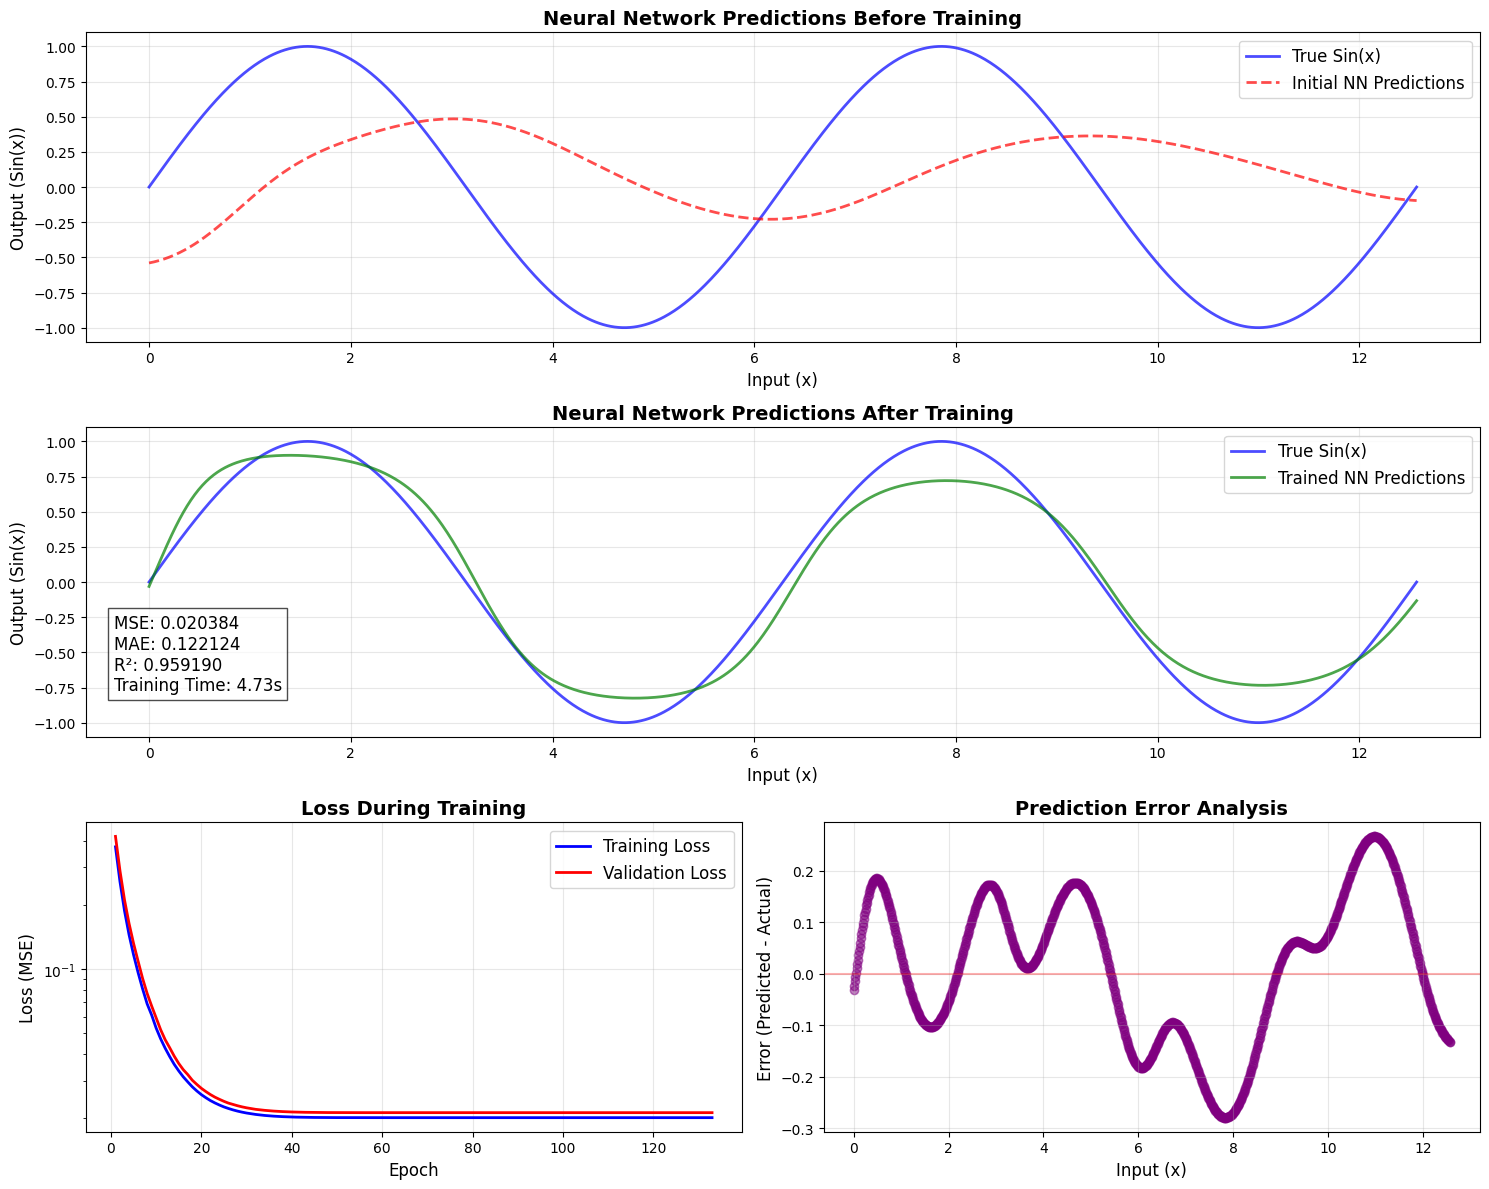

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


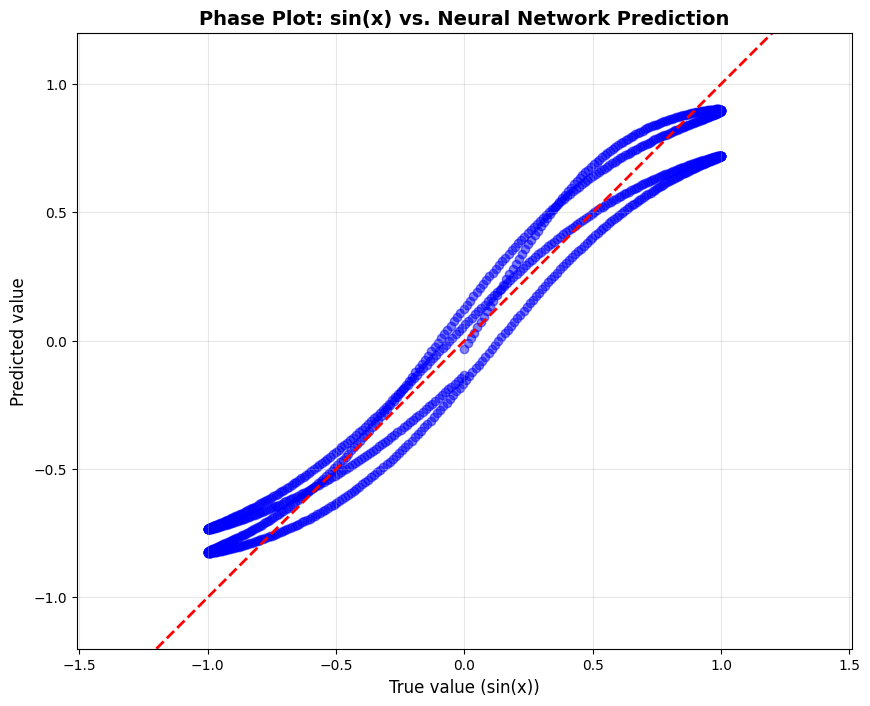

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
import time
import warnings

# Suppress tqdm warning
warnings.filterwarnings("ignore", category=UserWarning)

# Generate data with more range for better testing
x = np.linspace(0, 4 * np.pi, 1000)  # Expanded range to test generalization
y = np.sin(x)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Prepare data in the format needed by the neural network
training_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1))
    for i, j in zip(x_train, y_train)
]
validation_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1))
    for i, j in zip(x_val, y_val)
]

# Feature engineering: Add sin and cos of the input as features
# This helps the network learn periodic functions much faster
training_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y)
    for x, y in training_data
]
validation_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y)
    for x, y in validation_data
]

# Optimized network architecture for sine wave approximation
nn = NeuralNetwork(
    layer_sizes=[3, 32, 16, 1],  # Smaller network with engineered features
    activations=['tanh', 'tanh', 'tanh'],  # Tanh is ideal for sine waves
    dropout_rates=[0.0, 0.0, 0]  # No dropout needed with proper features
)

# Minimal L2 regularization
nn.lambd = 0.0

# Compute initial predictions for visualization
nn.toggle_training(False)
initial_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    initial_predictions.append(nn.feedforward(enhanced_input)[0][0])
initial_predictions = np.array(initial_predictions)

# Create figure with better layout
plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2)

# Plot 1: Initial predictions
ax1 = plt.subplot(gs[0, :])
ax1.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax1.plot(x, initial_predictions, 'r--', label="Initial NN Predictions", linewidth=2, alpha=0.7)
ax1.set_title("Neural Network Predictions Before Training", fontsize=14, fontweight='bold')
ax1.set_xlabel("Input (x)", fontsize=12)
ax1.set_ylabel("Output (Sin(x))", fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Train the network with optimized hyperparameters
print("Training neural network...")
start_time = time.time()

history = nn.train(
    training_data=training_data_enhanced,
    epochs=200,  # Fewer epochs needed with better features
    mini_batch_size=32,  # Smaller batches for more frequent updates
    learning_rate=0.01,  # Higher learning rate is fine with proper initialization
    decay=0.005,  # Slower decay
    schedule_type="exp_decay",  # Exponential decay for smoother reduction
    validation_data=validation_data_enhanced,
    early_stopping_patience=20,  # Earlier stopping is fine
    verbose=True
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Get final predictions
nn.toggle_training(False)
trained_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    trained_predictions.append(nn.feedforward(enhanced_input)[0][0])
trained_predictions = np.array(trained_predictions)

# Plot 2: Final predictions
ax2 = plt.subplot(gs[1, :])
ax2.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax2.plot(x, trained_predictions, 'g-', label="Trained NN Predictions", linewidth=2, alpha=0.7)
ax2.set_title("Neural Network Predictions After Training", fontsize=14, fontweight='bold')
ax2.set_xlabel("Input (x)", fontsize=12)
ax2.set_ylabel("Output (Sin(x))", fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# Compute error metrics
mse = np.mean((trained_predictions - y) ** 2)
mae = np.mean(np.abs(trained_predictions - y))
r2 = 1 - np.sum((y - trained_predictions) ** 2) / np.sum((y - np.mean(y)) ** 2)

# Add error metrics as text
metrics_text = f"MSE: {mse:.6f}\nMAE: {mae:.6f}\nR²: {r2:.6f}\nTraining Time: {training_time:.2f}s"
ax2.text(0.02, 0.15, metrics_text, transform=ax2.transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Plot 3: Training and validation loss
ax3 = plt.subplot(gs[2, 0])
epochs = range(1, len(history['loss']) + 1)
ax3.plot(epochs, history['loss'], 'b-', label='Training Loss', linewidth=2)
ax3.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax3.set_title("Loss During Training", fontsize=14, fontweight='bold')
ax3.set_xlabel("Epoch", fontsize=12)
ax3.set_ylabel("Loss (MSE)", fontsize=12)
ax3.set_yscale('log')  # Log scale for better visualization
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)

# Plot 4: Error analysis
ax4 = plt.subplot(gs[2, 1])
error = trained_predictions - y
ax4.scatter(x, error, color='purple', alpha=0.5)
ax4.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax4.set_title("Prediction Error Analysis", fontsize=14, fontweight='bold')
ax4.set_xlabel("Input (x)", fontsize=12)
ax4.set_ylabel("Error (Predicted - Actual)", fontsize=12)
ax4.grid(True, alpha=0.3)

# Improve layout
plt.tight_layout()
plt.savefig('neural_network_sin_approximation.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional visualization: Phase plot to verify the learned function behaves correctly
plt.figure(figsize=(10, 8))
plt.title("Phase Plot: sin(x) vs. Neural Network Prediction", fontsize=14, fontweight='bold')
plt.scatter(y, trained_predictions, alpha=0.5, color='blue')
plt.plot([-1.2, 1.2], [-1.2, 1.2], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel("True value (sin(x))", fontsize=12)
plt.ylabel("Predicted value", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.savefig('phase_plot.png', dpi=300, bbox_inches='tight')
plt.show()


### Expected Output

You will know that the implementation is correct when you see the following plot:

![Neural Network Training](assets/neural_network_sin_approximation.png)

## GRADIENTE DESCENDIENTE SIMPLE

In [17]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

def initialize_weights_glorot(n_in, n_out):
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit, (n_out, n_in))

def initialize_weights_he(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(2 / n_in)

class NeuralNetwork:
    def __init__(self, layer_sizes, activations=None, dropout_rates=None):
        """
        Initialize the neural network with support for different activation functions and dropout.

        Parameters:
        -----------
        layer_sizes : list
            List containing the size of each layer
        activations : list, optional
            List containing the activation function for each layer (default: tanh for all)
        dropout_rates : list, optional
            List containing dropout rate for each layer (default: no dropout)
        """
        self.num_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes

        # Initialize activation functions
        if activations is None:
            self.activations = ['tanh'] * (self.num_layers - 1)
        else:
            self.activations = activations

        # Map activation functions to their implementations
        self.activation_funcs = {
            'tanh': tanh,
            'relu': relu,
            'sigmoid': sigmoid
        }

        self.activation_primes = {
            'tanh': tanh_prime,
            'relu': relu_prime,
            'sigmoid': sigmoid_prime
        }

        # Initialize dropout rates (0 means no dropout)
        if dropout_rates is None:
            self.dropout_rates = [0] * (self.num_layers - 1)
        else:
            self.dropout_rates = dropout_rates

        # Initialize weights with appropriate initializers based on activation function
        self.weights = []
        for i in range(len(layer_sizes) - 1):
            if self.activations[i] == 'relu':
                # He initialization for ReLU
                self.weights.append(initialize_weights_he(layer_sizes[i], layer_sizes[i+1]))
            else:
                # Glorot/Xavier initialization for tanh/sigmoid
                self.weights.append(initialize_weights_glorot(layer_sizes[i], layer_sizes[i+1]))

        # Initialize biases, velocities, and batch normalization parameters
        self.biases = [np.zeros((y, 1)) for y in layer_sizes[1:]]
        self.velocity_b = [np.zeros(b.shape) for b in self.biases]
        self.velocity_w = [np.zeros(w.shape) for w in self.weights]

        # For L2 regularization
        self.lambd = 0.0  # regularization parameter, 0 means no regularization

        # Track if we're in training mode (for dropout)
        self.training = True

    def toggle_training(self, training=True):
        """Toggle between training and evaluation mode (affects dropout)"""
        self.training = training

    def apply_dropout(self, layer_output, dropout_rate):
        """Apply dropout to layer output during training"""
        if not self.training or dropout_rate == 0:
            return layer_output, None

        # Generate dropout mask
        keep_prob = 1 - dropout_rate
        mask = np.random.binomial(1, keep_prob, size=layer_output.shape) / keep_prob

        # Apply mask
        return layer_output * mask, mask

    def feedforward(self, a, return_intermediates=False):
        """
        Perform forward propagation through the network.

        Parameters:
        -----------
        a : ndarray
            Input to the network
        return_intermediates : bool, optional
            If True, return intermediate values for backpropagation

        Returns:
        --------
        If return_intermediates is False, returns only the final output.
        If return_intermediates is True, returns (activations, zs, dropout_masks)
        """
        activations = [a]
        zs = []
        dropout_masks = []

        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)

            # Apply activation function
            activation_func = self.activation_funcs[self.activations[i]]
            a = activation_func(z)

            # Apply dropout (except at the output layer)
            if i < len(self.weights) - 1 and self.dropout_rates[i] > 0:
                a, mask = self.apply_dropout(a, self.dropout_rates[i])
                dropout_masks.append(mask)
            else:
                dropout_masks.append(None)

            activations.append(a)

        if return_intermediates:
            return activations, zs, dropout_masks
        else:
            return activations[-1]

    def backpropagation(self, x, y):
        """
        Perform backpropagation to compute gradients.

        Parameters:
        -----------
        x : ndarray
            Input to the network
        y : ndarray
            Target output

        Returns:
        --------
        tuple (grad_b, grad_w) containing gradients
        """
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        # Forward pass
        activations, zs, dropout_masks = self.feedforward(x, return_intermediates=True)

        # Backward pass
        # Compute the error at the output layer
        delta = self.cost_derivative(activations[-1], y)

        # Apply the derivative of the activation function
        output_activation = self.activations[-1]
        delta = delta * self.activation_primes[output_activation](zs[-1])

        # Set the gradients for the output layer
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)

        # Add L2 regularization to the weights gradient (not biases)
        if self.lambd > 0:
            grad_w[-1] += (self.lambd / len(x)) * self.weights[-1]

        # Backpropagate the error
        for l in range(2, len(self.biases) + 1):
            # Get the activation derivative for this layer
            activation_func = self.activations[-l]
            delta = np.dot(self.weights[-l+1].T, delta)

            # Apply dropout mask from the forward pass
            if dropout_masks[-l] is not None:
                delta = delta * dropout_masks[-l]

            # Apply activation derivative
            delta = delta * self.activation_primes[activation_func](zs[-l])

            # Set gradients
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l-1].T)

            # Add L2 regularization
            if self.lambd > 0:
                grad_w[-l] += (self.lambd / len(x)) * self.weights[-l]

        return (grad_b, grad_w)

    def gradient_descent_simple(self, mini_batch, eta, mu=None):
        

        # Inicialización de gradientes
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        # Se acumulan los gradientes de cada mini-batch
        for x, y in mini_batch:
            delta_grad_b, delta_grad_w = self.backpropagation(x, y)
            grad_b = [gb + dgb for gb, dgb in zip(grad_b, delta_grad_b)]
            grad_w = [gw + dgw for gw, dgw in zip(grad_w, delta_grad_w)]

        # Promediar los gradientes
        m = len(mini_batch)
        grad_b = [gb / m for gb in grad_b]
        grad_w = [gw / m for gw in grad_w]

        # Actualización de pesos y sesgos
        self.biases = [b - eta * gb for b, gb in zip(self.biases, grad_b)]
        self.weights = [w - eta * gw for w, gw in zip(self.weights, grad_w)]



            
    def cost_derivative(self, output_activations, y):
        """Derivative of the cost function (MSE)"""
        return output_activations - y

    def update_learning_rate(self, epoch, initial_lr, schedule_type="step_decay", decay=0.1, drop_every=1000):
        """
        Update learning rate based on schedule.

        Parameters:
        -----------
        epoch : int
            Current epoch number
        initial_lr : float
            Initial learning rate
        schedule_type : str, optional
            Type of learning rate schedule
        decay : float, optional
            Decay factor
        drop_every : int, optional
            Number of epochs between drops for step decay

        Returns:
        --------
        float : Updated learning rate
        """
        if schedule_type == "step_decay":
            return initial_lr * (decay ** np.floor(epoch / drop_every))
        elif schedule_type == "exp_decay":
            return initial_lr * np.exp(-decay * epoch)
        elif schedule_type == "inv_scaling":
            return initial_lr / (1 + decay * epoch)
        elif schedule_type == "cosine":
            # Cosine annealing
            max_epochs = 1000  # Default max epochs
            return initial_lr * (1 + np.cos(np.pi * epoch / max_epochs)) / 2
        else:
            return initial_lr

    def train(self, training_data, epochs, mini_batch_size, learning_rate,
            decay=0.1, schedule_type="step_decay", validation_data=None,
            early_stopping_patience=None, verbose=True):
        """
        Train the neural network with progress tracking.

        Parameters:
        -----------
        training_data : list
            List of (x, y) tuples for training
        epochs : int
            Number of epochs to train
        mini_batch_size : int
            Size of mini-batches
        learning_rate : float
            Initial learning rate
        decay : float, optional
            Learning rate decay factor
        schedule_type : str, optional
            Type of learning rate schedule
        validation_data : list, optional
            List of (x, y) tuples for validation
        early_stopping_patience : int, optional
            Number of epochs to wait for improvement before stopping
        verbose : bool, optional
            Whether to print progress

        Returns:
        --------
        dict : Training history containing loss and validation metrics
        """
        try:
            from tqdm.auto import tqdm
            use_tqdm = True
        except ImportError:
            print("tqdm not installed. Install with 'pip install tqdm' for progress bars.")
            use_tqdm = False

        n = len(training_data)
        loss_history = []
        val_loss_history = [] if validation_data else None

        # For early stopping
        best_val_loss = float('inf')
        patience_counter = 0
        best_weights = None
        best_biases = None

        # Enable dropout during training
        self.toggle_training(True)

        # Create epoch iterator with tqdm if available
        epoch_iter = tqdm(range(epochs), desc="Training", unit="epoch") if use_tqdm else range(epochs)

        for j in epoch_iter:
            # Shuffle training data
            np.random.shuffle(training_data)

            # Create mini-batches
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]

            # Create mini-batch iterator with tqdm if available and verbose
            if use_tqdm and verbose:
                batch_iter = tqdm(mini_batches, desc=f"Epoch {j+1}/{epochs}",
                                leave=False, unit="batch")
            else:
                batch_iter = mini_batches

            # Train on mini-batches
            for mini_batch in batch_iter:
                self.gradient_descent_simple(mini_batch, learning_rate)

            # Update learning rate
            new_lr = self.update_learning_rate(j, learning_rate, schedule_type, decay)

            # Calculate training loss
            self.toggle_training(False)  # Disable dropout for evaluation
            current_loss = np.mean(
                [np.mean((self.feedforward(x) - y) ** 2) for x, y in training_data]
            )
            loss_history.append(current_loss)

            # Calculate validation loss if validation data provided
            current_val_loss = None
            if validation_data:
                current_val_loss = np.mean(
                    [np.mean((self.feedforward(x) - y) ** 2) for x, y in validation_data]
                )
                val_loss_history.append(current_val_loss)

                # Early stopping check
                if early_stopping_patience:
                    if current_val_loss < best_val_loss:
                        best_val_loss = current_val_loss
                        patience_counter = 0
                        # Save best model weights
                        best_weights = [w.copy() for w in self.weights]
                        best_biases = [b.copy() for b in self.biases]
                    else:
                        patience_counter += 1

                    if patience_counter >= early_stopping_patience:
                        if use_tqdm:
                            epoch_iter.set_postfix({
                                "early_stopping": True,
                                "best_val_loss": f"{best_val_loss:.6f}"
                            })
                        elif verbose:
                            print(f"Early stopping at epoch {j+1}")
                        break

            # Re-enable dropout for next training epoch
            self.toggle_training(True)

            # Update progress bar with metrics
            metrics = {
                "loss": f"{current_loss:.6f}",
                "lr": f"{new_lr:.6f}"
            }
            if current_val_loss is not None:
                metrics["val_loss"] = f"{current_val_loss:.6f}"

            if use_tqdm:
                epoch_iter.set_postfix(metrics)
            elif verbose and j % 10 == 0:
                val_str = f", Val Loss: {current_val_loss:.6f}" if current_val_loss is not None else ""
                print(f"Epoch {j+1}/{epochs}, Loss: {current_loss:.6f}{val_str}, LR: {new_lr:.6f}")

            # Update learning rate for next epoch
            learning_rate = new_lr

        # Restore best model if early stopping was used and best weights were saved
        if early_stopping_patience and best_weights is not None and best_biases is not None:
            self.weights = best_weights
            self.biases = best_biases
            if verbose:
                print(f"Restored best model with validation loss: {best_val_loss:.6f}")

        # Return results
        self.toggle_training(False)  # Ensure dropout is disabled after training
        return {
            "loss": loss_history,
            "val_loss": val_loss_history
        }



Training gradient descent...


Training:  67%|██████▋   | 134/200 [00:04<00:02, 26.93epoch/s, early_stopping=1, best_val_loss=0.019308]     


Restored best model with validation loss: 0.019308
Training completed in 4.98 seconds


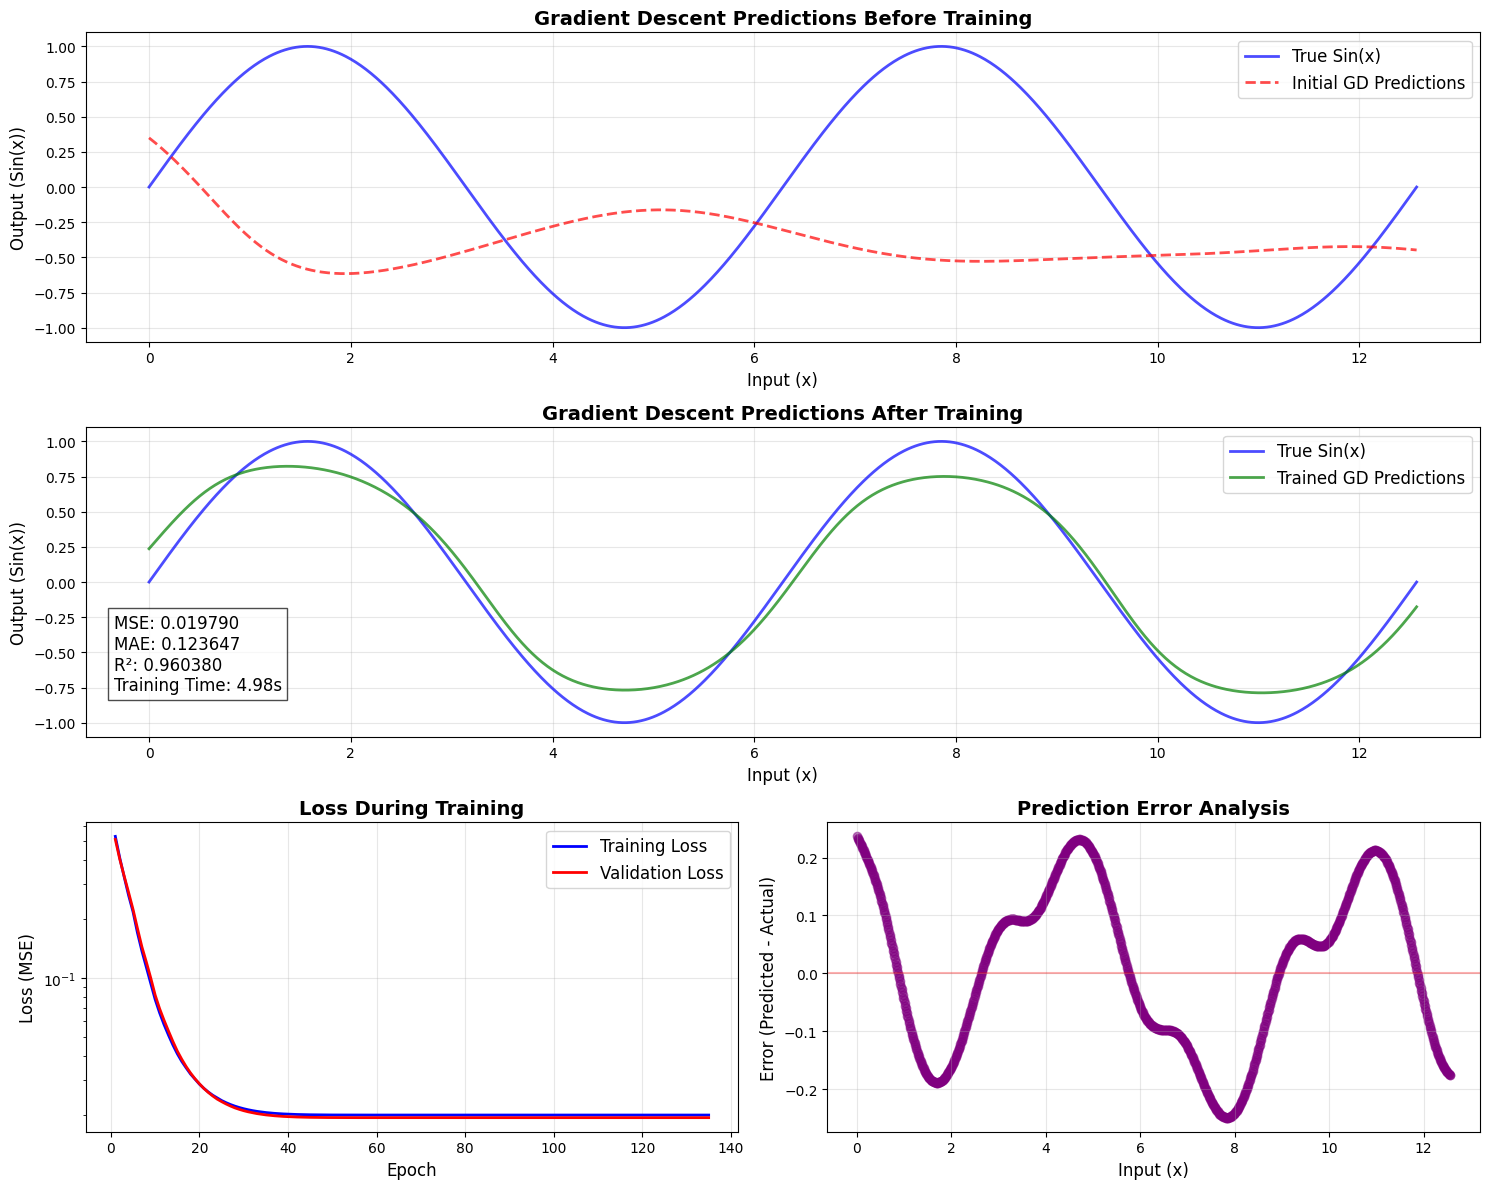

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


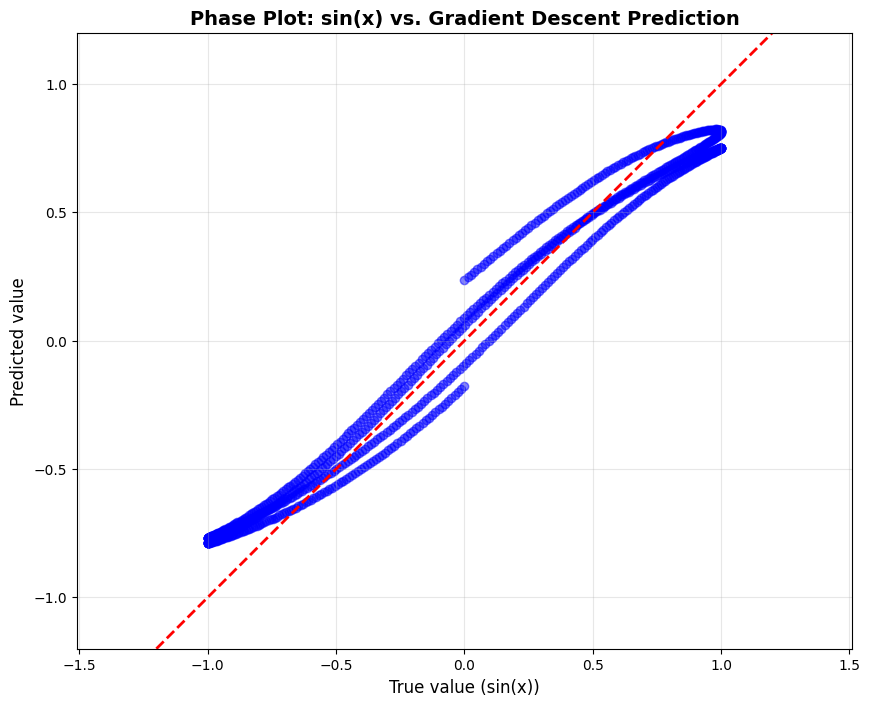

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
import time
import warnings

# Suppress tqdm warning
warnings.filterwarnings("ignore", category=UserWarning)

# Generate data with more range for better testing
x = np.linspace(0, 4 * np.pi, 1000)  # Expanded range to test generalization
y = np.sin(x)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Prepare data in the format needed by the neural network
training_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1))
    for i, j in zip(x_train, y_train)
]
validation_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1))
    for i, j in zip(x_val, y_val)
]

# Feature engineering: Add sin and cos of the input as features
# This helps the network learn periodic functions much faster
training_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y)
    for x, y in training_data
]
validation_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y)
    for x, y in validation_data
]

# Optimized network architecture for sine wave approximation
nn = NeuralNetwork(
    layer_sizes=[3, 32, 16, 1],  # Smaller network with engineered features
    activations=['tanh', 'tanh', 'tanh'],  # Tanh is ideal for sine waves
    dropout_rates=[0.0, 0.0, 0]  # No dropout needed with proper features
)

# Minimal L2 regularization
nn.lambd = 0.0

# Compute initial predictions for visualization
nn.toggle_training(False)
initial_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    initial_predictions.append(nn.feedforward(enhanced_input)[0][0])
initial_predictions = np.array(initial_predictions)

# Create figure with better layout
plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2)

# Plot 1: Initial predictions
ax1 = plt.subplot(gs[0, :])
ax1.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax1.plot(x, initial_predictions, 'r--', label="Initial GD Predictions", linewidth=2, alpha=0.7)
ax1.set_title("Gradient Descent Predictions Before Training", fontsize=14, fontweight='bold')
ax1.set_xlabel("Input (x)", fontsize=12)
ax1.set_ylabel("Output (Sin(x))", fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Train the network with optimized hyperparameters
print("Training gradient descent...")
start_time = time.time()

history = nn.train(
    training_data=training_data_enhanced,
    epochs=200,  # Fewer epochs needed with better features
    mini_batch_size=32,  # Smaller batches for more frequent updates
    learning_rate=0.01,  # Higher learning rate is fine with proper initialization
    decay=0.005,  # Slower decay
    schedule_type="exp_decay",  # Exponential decay for smoother reduction
    validation_data=validation_data_enhanced,
    early_stopping_patience=20,  # Earlier stopping is fine
    verbose=True
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Get final predictions
nn.toggle_training(False)
trained_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    trained_predictions.append(nn.feedforward(enhanced_input)[0][0])
trained_predictions = np.array(trained_predictions)

# Plot 2: Final predictions
ax2 = plt.subplot(gs[1, :])
ax2.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax2.plot(x, trained_predictions, 'g-', label="Trained GD Predictions", linewidth=2, alpha=0.7)
ax2.set_title("Gradient Descent Predictions After Training", fontsize=14, fontweight='bold')
ax2.set_xlabel("Input (x)", fontsize=12)
ax2.set_ylabel("Output (Sin(x))", fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# Compute error metrics
mse = np.mean((trained_predictions - y) ** 2)
mae = np.mean(np.abs(trained_predictions - y))
r2 = 1 - np.sum((y - trained_predictions) ** 2) / np.sum((y - np.mean(y)) ** 2)

# Add error metrics as text
metrics_text = f"MSE: {mse:.6f}\nMAE: {mae:.6f}\nR²: {r2:.6f}\nTraining Time: {training_time:.2f}s"
ax2.text(0.02, 0.15, metrics_text, transform=ax2.transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Plot 3: Training and validation loss
ax3 = plt.subplot(gs[2, 0])
epochs = range(1, len(history['loss']) + 1)
ax3.plot(epochs, history['loss'], 'b-', label='Training Loss', linewidth=2)
ax3.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax3.set_title("Loss During Training", fontsize=14, fontweight='bold')
ax3.set_xlabel("Epoch", fontsize=12)
ax3.set_ylabel("Loss (MSE)", fontsize=12)
ax3.set_yscale('log')  # Log scale for better visualization
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)

# Plot 4: Error analysis
ax4 = plt.subplot(gs[2, 1])
error = trained_predictions - y
ax4.scatter(x, error, color='purple', alpha=0.5)
ax4.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax4.set_title("Prediction Error Analysis", fontsize=14, fontweight='bold')
ax4.set_xlabel("Input (x)", fontsize=12)
ax4.set_ylabel("Error (Predicted - Actual)", fontsize=12)
ax4.grid(True, alpha=0.3)

# Improve layout
plt.tight_layout()
plt.savefig('neural_network_sin_approximation.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional visualization: Phase plot to verify the learned function behaves correctly
plt.figure(figsize=(10, 8))
plt.title("Phase Plot: sin(x) vs. Gradient Descent Prediction", fontsize=14, fontweight='bold')
plt.scatter(y, trained_predictions, alpha=0.5, color='blue')
plt.plot([-1.2, 1.2], [-1.2, 1.2], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel("True value (sin(x))", fontsize=12)
plt.ylabel("Predicted value", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.savefig('phase_plot.png', dpi=300, bbox_inches='tight')
plt.show()


#  ANÁLISIS

| Método        | Tiempo de Entrenamiento (s) | MSE (Error Cuadrático Medio) | MAE (Error Absoluto Medio) | R² (Bondad del Ajuste) | Training | Validation loss |
|--------------|-----------|-------------|------------|--------------|------------| ------ |
| Sin Momento  | 4.98         | 0.01979      | 0.1236            | 0.0.9603      |   67%       | 0.019308 |
| Con Momento  | 4.73         | 0.0203        | 0.1221          | 0.9591               | 66%     | 0.021279  |

En teoría, el uso del momento debería mejorar la velocidad y estabilidad del entrenamiento al permitir que el algoritmo de gradiente descendente avance más rápido en direcciones consistentes y supere mínimos locales o puntos de silla. Sin embargo, en este caso, los resultados muestran una situación extraña: como se puede ver en la tabla el algoritmo sin momento se entrenó más lento pero obtuvo una mejor precisión. Pero cabe resaltar que ambos algorítmos están muy parejos en término de sus resultados.

Algunas de las razones por las que esto pudo pasar son:

- El modelo no tenía un problema de sobreajuste
- Mini-batch y Batch Normalization ya reducían la variabilidad de los gradientes
- Los pesos estaban bien inicializados
- Aproximar una función sin es un problema estable sin oscilaciones muy grandes

Por otro lado, el hecho de que el Validation Loss sea menor en el algoritmo sin momento indica que este modelo generalizó mejor algunos datos no vistos. Esto sugiere que el momento pudo haber causado actualizaciones menos precisas o causó cierta inercia en direcciones subóptimas.

En conclusión, aunque el momento suele mejorar la estabilidad y velocidad del entrenamiento, en este caso no aportó beneficios mayores y el algoritmo sin momento tuvo un rendimiento ligeramente mejor, como se puede ver en la tabla. Esto puede explicarse porque el modelo ya era estable y bien regulado o por la naturaleza de la función seno. Como resultado, el momento pudo haber introducido una inercia innecesaria, haciendo que el entrenamiento fuera más lento y menos preciso de lo que normalmente pudo haber sido. 